In [14]:
!pip install yfinance
import yfinance as yf

# Download 5 years of TCS stock data
df = yf.download('TCS.NS', start='2018-01-01', end='2025-12-31')
df.to_csv('stock_data.csv')
df.head()


/tmp/ipython-input-2914281714.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TCS.NS', start='2018-01-01', end='2025-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2018-01-01,1103.473022,1123.994196,1099.051749,1118.780478,1351760
2018-01-02,1097.467163,1113.483772,1092.879090,1109.479594,1920290
2018-01-03,1100.574463,1113.233415,1097.467106,1097.800805,1257120
2018-01-04,1108.269897,1110.313635,1101.137489,1105.308464,913082
2018-01-05,1121.658691,1125.954816,1105.308488,1105.308488,1153706


Load Data

In [15]:
import pandas as pd

df = pd.read_csv('stock_data.csv', header=1)

# The first row of the DataFrame after header=1 seems to contain 'Date' as a data entry.
# We need to drop this row as it's not actual stock data.
df = df.iloc[1:].copy()

# The actual dates are in the column currently named 'Ticker'. Rename it to 'Date'.
df = df.rename(columns={'Ticker': 'Date'})

# Rename the stock data columns to their appropriate names
df = df.rename(columns={'TCS.NS': 'Close', 'TCS.NS.1': 'High', 'TCS.NS.2': 'Low', 'TCS.NS.3': 'Open', 'TCS.NS.4': 'Volume'})

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.head()

,Date,Close,High,Low,Open,Volume
1,2018-01-01,1103.473022,1123.994196,1099.051749,1118.780478,1351760.0
2,2018-01-02,1097.467163,1113.483772,1092.879090,1109.479594,1920290.0
3,2018-01-03,1100.574463,1113.233415,1097.467106,1097.800805,1257120.0
4,2018-01-04,1108.269897,1110.313635,1101.137489,1105.308464,913082.0
5,2018-01-05,1121.658691,1125.954816,1105.308488,1105.308488,1153706.0


Calculate Returns & Moving Averages

In [16]:
df['Return'] = df['Close'].pct_change()
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()


Detect Trend

In [17]:
df['Trend'] = df['MA20'] > df['MA50']
df[['Date','Close','MA20','MA50','Trend']].tail(10)


,Date,Close,MA20,MA50,Trend
1968,2025-12-17,3217.800049,3180.439990,3094.894946,True
1969,2025-12-18,3280.800049,3187.239990,3100.191919,True
1970,2025-12-19,3282.000000,3193.809985,3104.825454,True
1971,2025-12-22,3324.899902,3202.994983,3110.982505,True
1972,2025-12-23,3310.000000,3212.534985,3117.261987,True
1973,2025-12-24,3319.000000,3220.339990,3124.655986,True
1974,2025-12-25,3319.000000,3229.459985,3131.639985,True
1975,2025-12-26,3280.000000,3236.584985,3137.825986,True
1976,2025-12-29,3251.500000,3242.489990,3143.611987,True
1977,2025-12-30,3246.800049,3248.044995,3148.243989,True


Volatility

In [18]:
df['Volatility'] = df['Return'].rolling(20).std()


Visualize

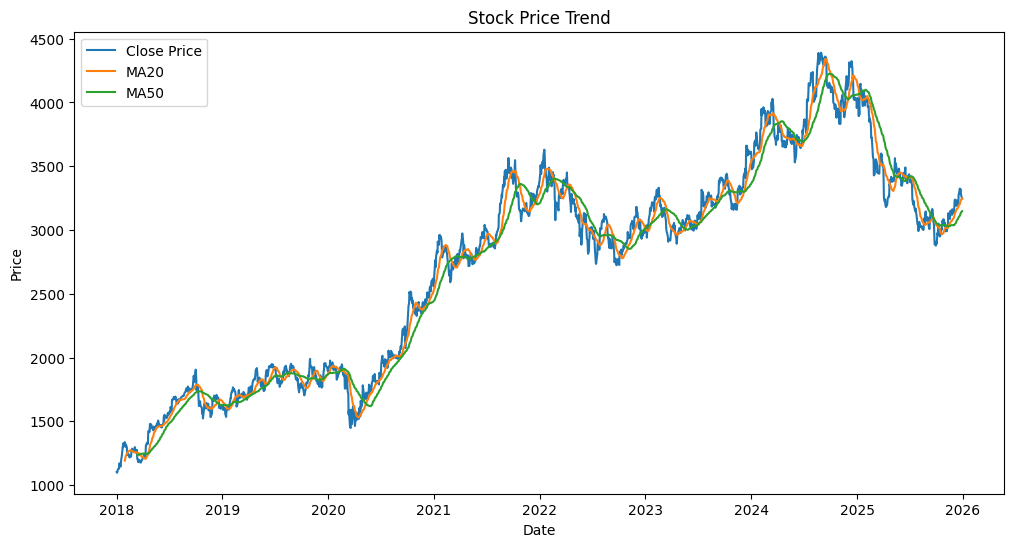

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA20'], label='MA20')
plt.plot(df['Date'], df['MA50'], label='MA50')
plt.title('Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Rank / Highlight Signals

In [20]:
golden_cross = df[(df['MA20'] > df['MA50']) & (df['MA20'].shift(1) < df['MA50'].shift(1))]
death_cross = df[(df['MA20'] < df['MA50']) & (df['MA20'].shift(1) > df['MA50'].shift(1))]

print("Golden Cross Dates:")
print(golden_cross['Date'])
print("Death Cross Dates:")
print(death_cross['Date'])


Golden Cross Dates:
75     2018-04-20
236    2018-12-14
274    2019-02-07
404    2019-08-23
453    2019-11-07
489    2019-12-31
577    2020-05-12
805    2021-04-07
849    2021-06-11
894    2021-08-16
979    2021-12-20
1053   2022-04-06
1141   2022-08-12
1195   2022-11-02
1252   2023-01-23
1328   2023-05-18
1363   2023-07-07
1467   2023-12-08
1603   2024-07-02
1708   2024-12-03
1822   2025-05-21
1908   2025-09-22
1944   2025-11-13
Name: Date, dtype: datetime64[ns]
Death Cross Dates:
56     2018-03-22
201    2018-10-24
254    2019-01-10
383    2019-07-23
425    2019-09-25
477    2019-12-12
521    2020-02-13
782    2021-03-02
830    2021-05-17
883    2021-07-30
941    2021-10-25
1024   2022-02-22
1068   2022-04-29
1163   2022-09-15
1237   2023-01-02
1288   2023-03-16
1359   2023-07-03
1443   2023-11-02
1546   2024-04-05
1667   2024-10-03
1734   2025-01-09
1848   2025-06-26
1913   2025-09-29
Name: Date, dtype: datetime64[ns]


Save Final Result

In [26]:
df.to_csv('stock_analysis_result.csv', index=False)
